In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [15]:
ticker = "^SPX"
interval = '1mo'  # 1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo
start_date = "2000-01-01"
end_date = "2023-01-01"


In [16]:
sp500 = yf.download(ticker, start=start_date, end=end_date, interval=interval)
log_returns = np.log(sp500['Close'] / sp500['Close'].shift(1)).dropna()
log_returns_norm = (log_returns - log_returns.mean()) / log_returns.std()


[*********************100%***********************]  1 of 1 completed


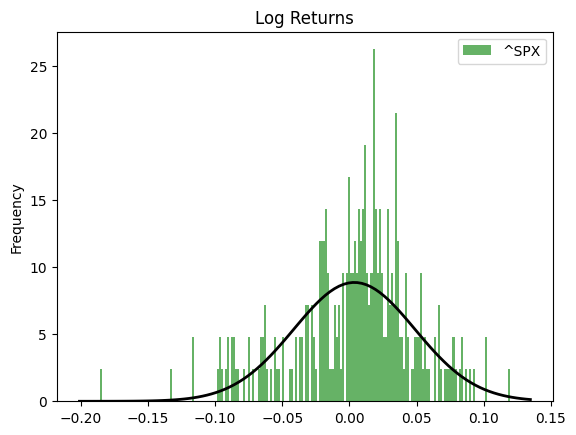

In [10]:
log_returns.plot(kind='hist', bins=200, density=True, alpha=0.6, color='g', title='Log Returns')
mu, std = log_returns.mean(), log_returns.std()
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

plt.legend()
plt.show()

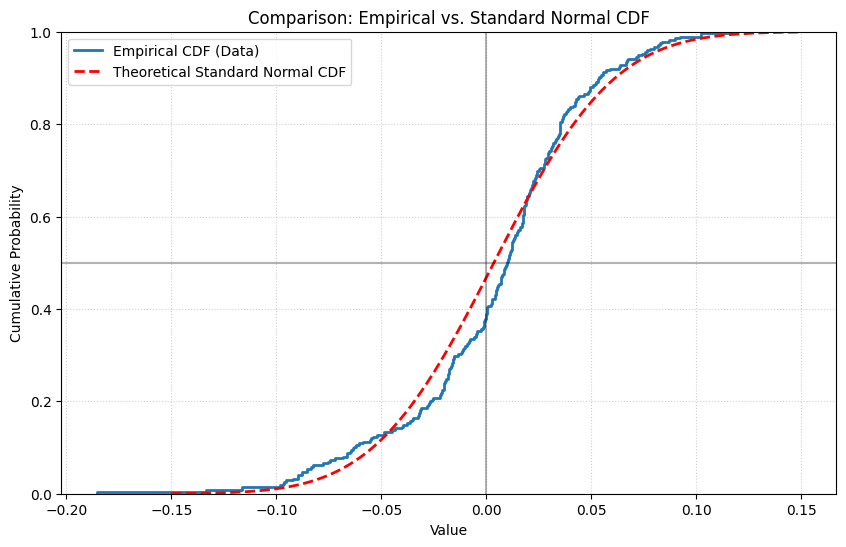

In [11]:
plt.figure(figsize=(10, 6))
sns.ecdfplot(log_returns, label='Empirical CDF (Data)', color='blue', linewidth=2)
x = np.linspace(-0.15, 0.15, 1000)
y_theoretical = norm.cdf(x, loc=log_returns.mean(), scale=log_returns.std())
plt.plot(x, y_theoretical, label='Theoretical Standard Normal CDF', color='red', linestyle='--', linewidth=2)
plt.title('Comparison: Empirical vs. Standard Normal CDF')
plt.xlabel('Value')
plt.ylabel('Cumulative Probability')
plt.axvline(0, color='black', alpha=0.3, linestyle='-') # Center line
plt.axhline(0.5, color='black', alpha=0.3, linestyle='-') # Median line
plt.legend()
plt.grid(True, linestyle=':', alpha=0.6)

plt.show()

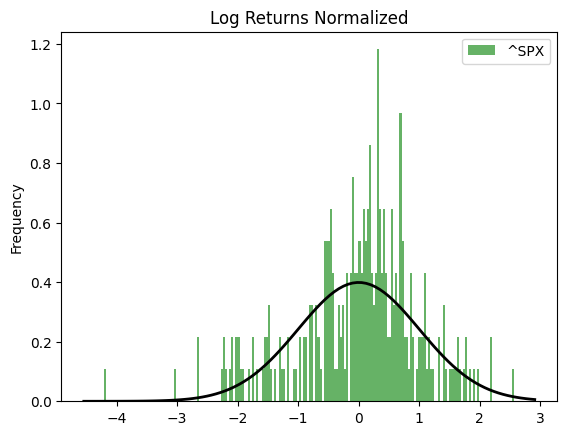

In [12]:
log_returns_norm.plot(kind='hist', bins=200, density=True, alpha=0.6, color='g', title='Log Returns Normalized')
mu, std = log_returns_norm.mean(), log_returns_norm.std()
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

plt.legend()
plt.show()


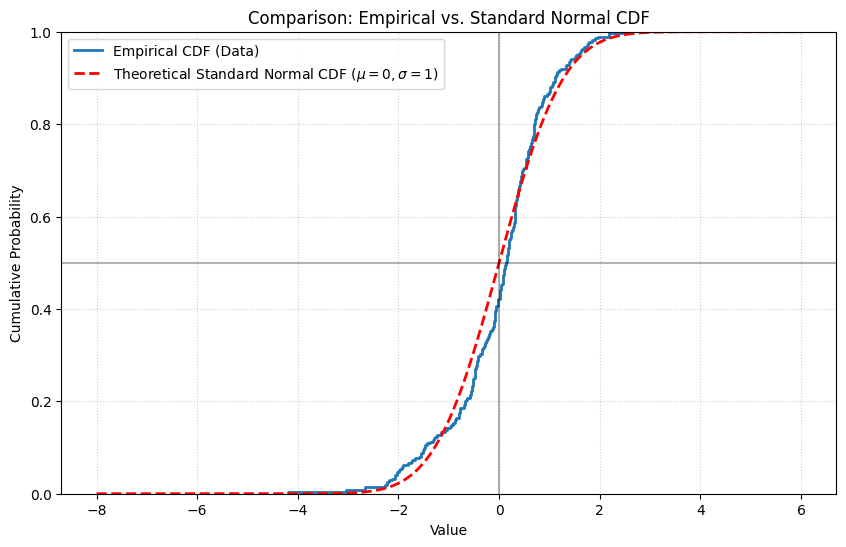

In [13]:
plt.figure(figsize=(10, 6))
sns.ecdfplot(log_returns_norm, label='Empirical CDF (Data)', color='blue', linewidth=2)
x = np.linspace(-8, 6, 1000)
y_theoretical = norm.cdf(x)
plt.plot(x, y_theoretical, label='Theoretical Standard Normal CDF ($\mu=0, \sigma=1$)', 
         color='red', linestyle='--', linewidth=2)
plt.title('Comparison: Empirical vs. Standard Normal CDF')
plt.xlabel('Value')
plt.ylabel('Cumulative Probability')
plt.axvline(0, color='black', alpha=0.3, linestyle='-') # Center line
plt.axhline(0.5, color='black', alpha=0.3, linestyle='-') # Median line
plt.legend()
plt.grid(True, linestyle=':', alpha=0.6)

plt.show()
